# K-Mean Ver. with 10 new labels

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

## >> import DF <<

In [3]:
## 데이터 불러오기
df = pd.read_csv('../raw_data/df_grouped_rate.csv')
df.tail()

,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,...,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
113260,2019,1001010,CS300008,1.441360e+08,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.0
113261,2019,1001010,CS300009,3.067237e+09,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.0
113262,2019,1001010,CS300011,1.794132e+07,1.0,0,1,230,164052,179007,...,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.0
113263,2019,1001010,CS300016,8.942270e+06,3.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.0
113264,2019,1001010,CS300017,3.687740e+06,6.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.976623,0.800000,0.371429,0.000000,0.129870,0.166234,0.703896,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113265 entries, 0 to 113264
Data columns (total 21 columns):
year                        113265 non-null int64
district                    113265 non-null int64
code                        113265 non-null object
sales_total                 113265 non-null float64
s_store_no_of_store         113265 non-null float64
s_store_no_of_opening       113265 non-null int64
s_store_no_of_closing       113265 non-null int64
s_work_female               113265 non-null int64
s_float_male                113265 non-null int64
s_float_female              113265 non-null int64
b_facil_total               113265 non-null float64
b_apt_avg_price             113265 non-null float64
b_income_avg_monthly_inc    113265 non-null float64
sales_weekday               113265 non-null float64
sales_female                113265 non-null float64
sales_2030s                 113265 non-null float64
sales_06_11                 113265 non-null float64
sales_11_14         

In [5]:
len(np.unique(df['district'])), len(np.unique(df['code']))

(1007, 45)

In [6]:
## 불러온 dataframe에서 상권코드, 연도 제거하기 / 독립 종속 변수 분리하기
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

## >> Train-test Split <<

In [7]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
len(X_train)

90612

In [9]:
X_train.tail()

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
21243,4.5,1,0,1374,425590,398957,74.0,183091939.0,4535335.0,0.937438,0.653510,0.099016,0.001939,0.243747,0.339160,0.349011,0.066143
45891,4.0,0,3,1439,388246,418137,139.5,154255612.0,3694881.0,0.772681,0.411837,0.345864,0.096078,0.343058,0.215489,0.317314,0.028061
42613,1.0,0,0,355,404221,353705,78.5,389307703.0,5351726.0,0.888499,0.116359,0.151496,0.006715,0.174289,0.307938,0.465824,0.045234
43567,16.0,2,2,1934,635523,685118,163.0,442645701.0,5565767.5,0.893880,0.252188,0.279502,0.020218,0.532598,0.095126,0.244340,0.095236
68268,2.0,1,0,695,689046,658570,112.0,153669631.0,3172759.0,0.760891,0.881880,0.439548,0.000000,0.166395,0.195750,0.414725,0.223130


In [10]:
#cl = X_train.iloc[:, 1:]
#cl.tail()

In [11]:
#len(cl)

In [12]:
#%%time
#from sklearn.mixture import GaussianMixture
#gm = GaussianMixture(n_components=10)
#gm.fit(cl)
#y_pred = gm.predict(cl)

## >> Clustering <<

In [13]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)
train_labels = kmeans.labels_

Wall time: 7.88 s


In [14]:
train_lb_df= pd.DataFrame(train_labels, columns=['labels'], index=X_train.index, dtype=str)
train_lb_df.tail()

,labels
21243,6
45891,1
42613,3
43567,2
68268,1


In [15]:
X_train = pd.concat([train_lb_df, X_train], axis=1)
X_train.tail()

,labels,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
21243,6,4.5,1,0,1374,425590,398957,74.0,183091939.0,4535335.0,0.937438,0.653510,0.099016,0.001939,0.243747,0.339160,0.349011,0.066143
45891,1,4.0,0,3,1439,388246,418137,139.5,154255612.0,3694881.0,0.772681,0.411837,0.345864,0.096078,0.343058,0.215489,0.317314,0.028061
42613,3,1.0,0,0,355,404221,353705,78.5,389307703.0,5351726.0,0.888499,0.116359,0.151496,0.006715,0.174289,0.307938,0.465824,0.045234
43567,2,16.0,2,2,1934,635523,685118,163.0,442645701.0,5565767.5,0.893880,0.252188,0.279502,0.020218,0.532598,0.095126,0.244340,0.095236
68268,1,2.0,1,0,695,689046,658570,112.0,153669631.0,3172759.0,0.760891,0.881880,0.439548,0.000000,0.166395,0.195750,0.414725,0.223130


In [16]:
X_train.groupby(by='labels').size()

labels
0     9623
1    26595
2     1196
3     3652
4      193
5     6152
6    15620
7    26937
8      544
9      100
dtype: int64

비대칭 데이터 문제 확인 - Under or Over-Sampling

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90612 entries, 49907 to 68268
Data columns (total 18 columns):
labels                      90612 non-null object
s_store_no_of_store         90612 non-null float64
s_store_no_of_opening       90612 non-null int64
s_store_no_of_closing       90612 non-null int64
s_work_female               90612 non-null int64
s_float_male                90612 non-null int64
s_float_female              90612 non-null int64
b_facil_total               90612 non-null float64
b_apt_avg_price             90612 non-null float64
b_income_avg_monthly_inc    90612 non-null float64
sales_weekday               90612 non-null float64
sales_female                90612 non-null float64
sales_2030s                 90612 non-null float64
sales_06_11                 90612 non-null float64
sales_11_14                 90612 non-null float64
sales_14_17                 90612 non-null float64
sales_17_21                 90612 non-null float64
sales_21_24                 906

In [18]:
## 더미변수화
X_train_dum = pd.get_dummies(X_train)
X_train_dum.tail()
## Robust Scaling - fit_transform
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train_dum)

## >> Regressor <<

### 1) Linear Regressor

In [20]:
## Regressor fitting for the train data
#regressor = LinearRegression()
#model = regressor.fit(Xs_train, y_train)
#print(model.score(Xs_train, y_train))

In [21]:
#from statsmodels.regression.linear_model import OLS
#model2 = OLS(y_train, Xs_train)
#result = model2.fit()
#print(result.summary())

### 2) Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
model = rf.fit(Xs_train, y_train)
print(model.score(Xs_train, y_train))

0.9468630645002112


## >> Test Data <<

In [21]:
X_test

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
93010,4.0,1,0,215,128632,131642,74.0,312892159.0,4023035.0,0.873483,0.699700,0.416222,0.181142,0.222460,0.365485,0.170012,0.060901
112628,6.0,1,0,1199,463376,476097,125.0,171771310.0,3834547.0,0.674029,0.692695,0.344597,0.051634,0.182468,0.317755,0.442624,0.003831
36799,3.0,0,0,83,212469,222032,80.0,82001075.0,2689753.5,0.833129,0.228373,0.272045,0.099142,0.283860,0.341558,0.247559,0.027881
13565,2.0,1,1,144,319117,361968,108.0,107861894.0,3507002.0,0.584779,0.347458,0.395292,0.033301,0.343452,0.165903,0.449638,0.007706
41602,2.0,0,0,473,277907,266305,77.0,99981302.0,3725041.0,0.680804,0.599767,0.448524,0.013314,0.150412,0.237413,0.417107,0.113820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2.0,0,0,1412,806450,590038,67.0,128059801.0,3243736.0,0.770547,0.305468,0.823097,0.000000,0.000168,0.013441,0.194082,0.578160
85111,29.0,3,4,2770,203385,149500,55.0,218609516.0,3750772.0,0.784574,0.214415,0.292550,0.006215,0.299116,0.062730,0.366508,0.235049
32886,2.0,0,1,6765,287627,286541,92.0,136431049.0,3623167.0,0.677072,0.464426,0.407043,0.027080,0.454249,0.259717,0.240663,0.017376
107501,1.0,0,0,73,53917,48479,196.0,189267175.0,3886485.0,0.779564,0.038538,0.031050,0.000000,0.000000,0.000000,0.073772,0.356750


In [22]:
test_labels = kmeans.predict(X_test)

In [23]:
len(np.unique(test_labels))

10

In [24]:
test_lb_df= pd.DataFrame(test_labels, columns=['labels'], index=X_test.index, dtype=str)

In [25]:
X_test = pd.concat([test_lb_df, X_test], axis=1)
X_test.tail()

,labels,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
2471,7,2.0,0,0,1412,806450,590038,67.0,128059801.0,3243736.0,0.770547,0.305468,0.823097,0.000000,0.000168,0.013441,0.194082,0.578160
85111,0,29.0,3,4,2770,203385,149500,55.0,218609516.0,3750772.0,0.784574,0.214415,0.292550,0.006215,0.299116,0.062730,0.366508,0.235049
32886,1,2.0,0,1,6765,287627,286541,92.0,136431049.0,3623167.0,0.677072,0.464426,0.407043,0.027080,0.454249,0.259717,0.240663,0.017376
107501,6,1.0,0,0,73,53917,48479,196.0,189267175.0,3886485.0,0.779564,0.038538,0.031050,0.000000,0.000000,0.000000,0.073772,0.356750
86286,1,1.0,1,0,273,424787,427656,66.0,150020089.0,4208675.0,0.745376,0.568990,0.563879,0.311780,0.266634,0.269138,0.152448,0.000000


In [26]:
X_test.groupby(by='labels').size()

labels
0    2366
1    6728
2     333
3     854
4      46
5    1549
6    3909
7    6730
8     117
9      21
dtype: int64

In [27]:
## 더미변수화
X_test_dum = pd.get_dummies(X_test)
## Robust Scaling - transform
Xs_test = rb.transform(X_test_dum)

In [28]:
print(model.score(Xs_test, y_test))

0.6081912920843262


In [29]:
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 491105536.06618464
Mean Squared Error: 1.0574016197903447e+18
Root Mean Squared Error: 1028300354.8527758


In [30]:
y_pred

array([9.53605369e+08, 8.40209059e+08, 5.06715694e+08, ...,
       2.91584316e+08, 5.31899965e+07, 2.55447605e+08])

In [31]:
y_test

,sales_total
93010,4.094017e+06
112628,1.236764e+09
36799,5.330413e+07
13565,3.455657e+07
41602,1.830000e+08
...,...
2471,8.000000e+07
85111,5.671255e+09
32886,3.139336e+08
107501,2.763426e+07


In [32]:
#def MPE(y_true, y_pred): 
#    return np.mean((y_true - y_pred) / y_true) * 100
#print('Mean Percentage Error', MPE(y_test['sales_total'], y_pred))

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(10, shuffle=True, random_state=0)
cross_val_score(model, Xs_test, y_test, n_jobs=-1, cv=cv)

array([0.53174497, 0.5341365 , 0.48325948, 0.44353251, 0.4534089 ,
       0.47609043, 0.35849913, 0.48404571, 0.41762352, 0.41854089])

In [34]:
from sklearn.model_selection import cross_validate
import sklearn.metrics
cv_results = cross_validate(model, Xs_test, y_test, scoring=('r2', 
                                                             'neg_mean_squared_error', 
                                                             'neg_mean_absolute_error'), 
                            cv=cv, 
                            n_jobs=-1)

In [35]:
sorted(sk.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [36]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_mean_squared_error', 'test_neg_mean_absolute_error'])

In [37]:
print(cv_results['test_r2'])

[0.53174497 0.5341365  0.48325948 0.44353251 0.4534089  0.47609043
 0.35849913 0.48404571 0.41762352 0.41854089]


In [38]:
print(cv_results['test_r2'].mean())

0.4600882041622243


In [39]:
print(-cv_results['test_neg_mean_squared_error'])
print(-cv_results['test_neg_mean_absolute_error'])

[1.29049569e+18 1.36409641e+18 1.24666414e+18 1.10602551e+18
 1.76611566e+18 1.67872553e+18 2.19460286e+18 1.22275709e+18
 1.30096483e+18 1.41644446e+18]
[5.69799798e+08 5.58883667e+08 5.67267686e+08 5.54386866e+08
 5.90250054e+08 5.81412366e+08 5.82451498e+08 5.69139614e+08
 5.56307066e+08 5.57254287e+08]


In [40]:
mse_ls = -cv_results['test_neg_mean_squared_error']

In [41]:
print(-cv_results['test_neg_mean_squared_error'].mean())
print(-cv_results['test_neg_mean_absolute_error'].mean())
print(np.sqrt(mse_ls).mean())

1.458689218259647e+18
568715290.2934637
1201471897.5056663


In [42]:
-cv_results['test_neg_mean_squared_error']

array([1.29049569e+18, 1.36409641e+18, 1.24666414e+18, 1.10602551e+18,
       1.76611566e+18, 1.67872553e+18, 2.19460286e+18, 1.22275709e+18,
       1.30096483e+18, 1.41644446e+18])

In [43]:
-cv_results['test_neg_mean_absolute_error']

array([5.69799798e+08, 5.58883667e+08, 5.67267686e+08, 5.54386866e+08,
       5.90250054e+08, 5.81412366e+08, 5.82451498e+08, 5.69139614e+08,
       5.56307066e+08, 5.57254287e+08])

In [44]:
(-cv_results['test_neg_mean_squared_error'])**0.5

array([1.13599986e+09, 1.16794538e+09, 1.11654115e+09, 1.05167748e+09,
       1.32895284e+09, 1.29565641e+09, 1.48141920e+09, 1.10578347e+09,
       1.14059845e+09, 1.19014472e+09])

# 상권코드 X 업종코드 + RF

In [146]:
df = pd.read_csv('raw_data/df_grouped_rate.csv')
df[['district', 'code']] = df[['district', 'code']].astype(str)
df.dtypes

year                          int64
district                     object
code                         object
sales_total                 float64
s_store_no_of_store         float64
s_store_no_of_opening         int64
s_store_no_of_closing         int64
s_work_female                 int64
s_float_male                  int64
s_float_female                int64
b_facil_total               float64
b_apt_avg_price             float64
b_income_avg_monthly_inc    float64
sales_weekday               float64
sales_female                float64
sales_2030s                 float64
sales_06_11                 float64
sales_11_14                 float64
sales_14_17                 float64
sales_17_21                 float64
sales_21_24                 float64
dtype: object

In [147]:
y = df[['sales_total']]
X = df.drop(['sales_total', 'year'], axis=1)

In [148]:
X_dum = pd.get_dummies(X)
X_dum.tail()

,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,...,code_CS300008,code_CS300009,code_CS300010,code_CS300011,code_CS300012,code_CS300013,code_CS300014,code_CS300015,code_CS300016,code_CS300017
113260,2.00,0,0,230,164052,179007,93.00,154040746.00,3256684.00,0.88,...,1,0,0,0,0,0,0,0,0,0
113261,2.00,0,0,230,164052,179007,93.00,154040746.00,3256684.00,0.93,...,0,1,0,0,0,0,0,0,0,0
113262,1.00,0,1,230,164052,179007,93.00,154040746.00,3256684.00,0.64,...,0,0,0,1,0,0,0,0,0,0
113263,3.00,0,0,230,164052,179007,93.00,154040746.00,3256684.00,0.62,...,0,0,0,0,0,0,0,0,1,0
113264,6.00,0,0,230,164052,179007,93.00,154040746.00,3256684.00,0.98,...,0,0,0,0,0,0,0,0,0,1


In [149]:
X_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113265 entries, 0 to 113264
Columns: 1069 entries, s_store_no_of_store to code_CS300017
dtypes: float64(12), int64(5), uint8(1052)
memory usage: 128.3 MB


In [150]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=0)

In [151]:
## Robust Scaling - fit_transform
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train)
Xs_test = rb.transform(X_test)

In [152]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
model = rf.fit(Xs_train, y_train)
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))

0.9662886053976625
0.7551745929563399


In [165]:
pd.options.display.float_format = '{:.2g}'.format
model.feature_importances_

array([0.31871495, 0.00747284, 0.00948001, ..., 0.0086383 , 0.00038613,
       0.00083226])

In [154]:
X_dum.columns

Index(['s_store_no_of_store', 's_store_no_of_opening', 's_store_no_of_closing',
       's_work_female', 's_float_male', 's_float_female', 'b_facil_total',
       'b_apt_avg_price', 'b_income_avg_monthly_inc', 'sales_weekday',
       ...
       'code_CS300008', 'code_CS300009', 'code_CS300010', 'code_CS300011',
       'code_CS300012', 'code_CS300013', 'code_CS300014', 'code_CS300015',
       'code_CS300016', 'code_CS300017'],
      dtype='object', length=1069)

In [166]:
model.feature_importances_

array([0.31871495, 0.00747284, 0.00948001, ..., 0.0086383 , 0.00038613,
       0.00083226])

In [156]:
feat_imp = pd.DataFrame(data=model.feature_importances_)

In [157]:
feat_imp.index = list(X_dum.columns)

In [158]:
feat_imp.columns = ['feature_importances']
feat_imp.tail()

,feature_importances
code_CS300013,0.00
code_CS300014,0.00
code_CS300015,0.01
code_CS300016,0.00
code_CS300017,0.00


In [159]:
feat_imp[feat_imp['feature_importances'] < 0.01].sort_values(by='feature_importances', ascending=False)

,feature_importances
s_store_no_of_closing,0.01
code_CS300015,0.01
district_1000935,0.01
s_store_no_of_opening,0.01
code_CS300012,0.00
...,...
district_1000431,0.00
district_1000970,0.00
district_1000330,0.00
district_1000841,0.00


In [160]:
barchart_df = feat_imp[feat_imp['feature_importances'] >= 0.01].sort_values(by='feature_importances', ascending=False)

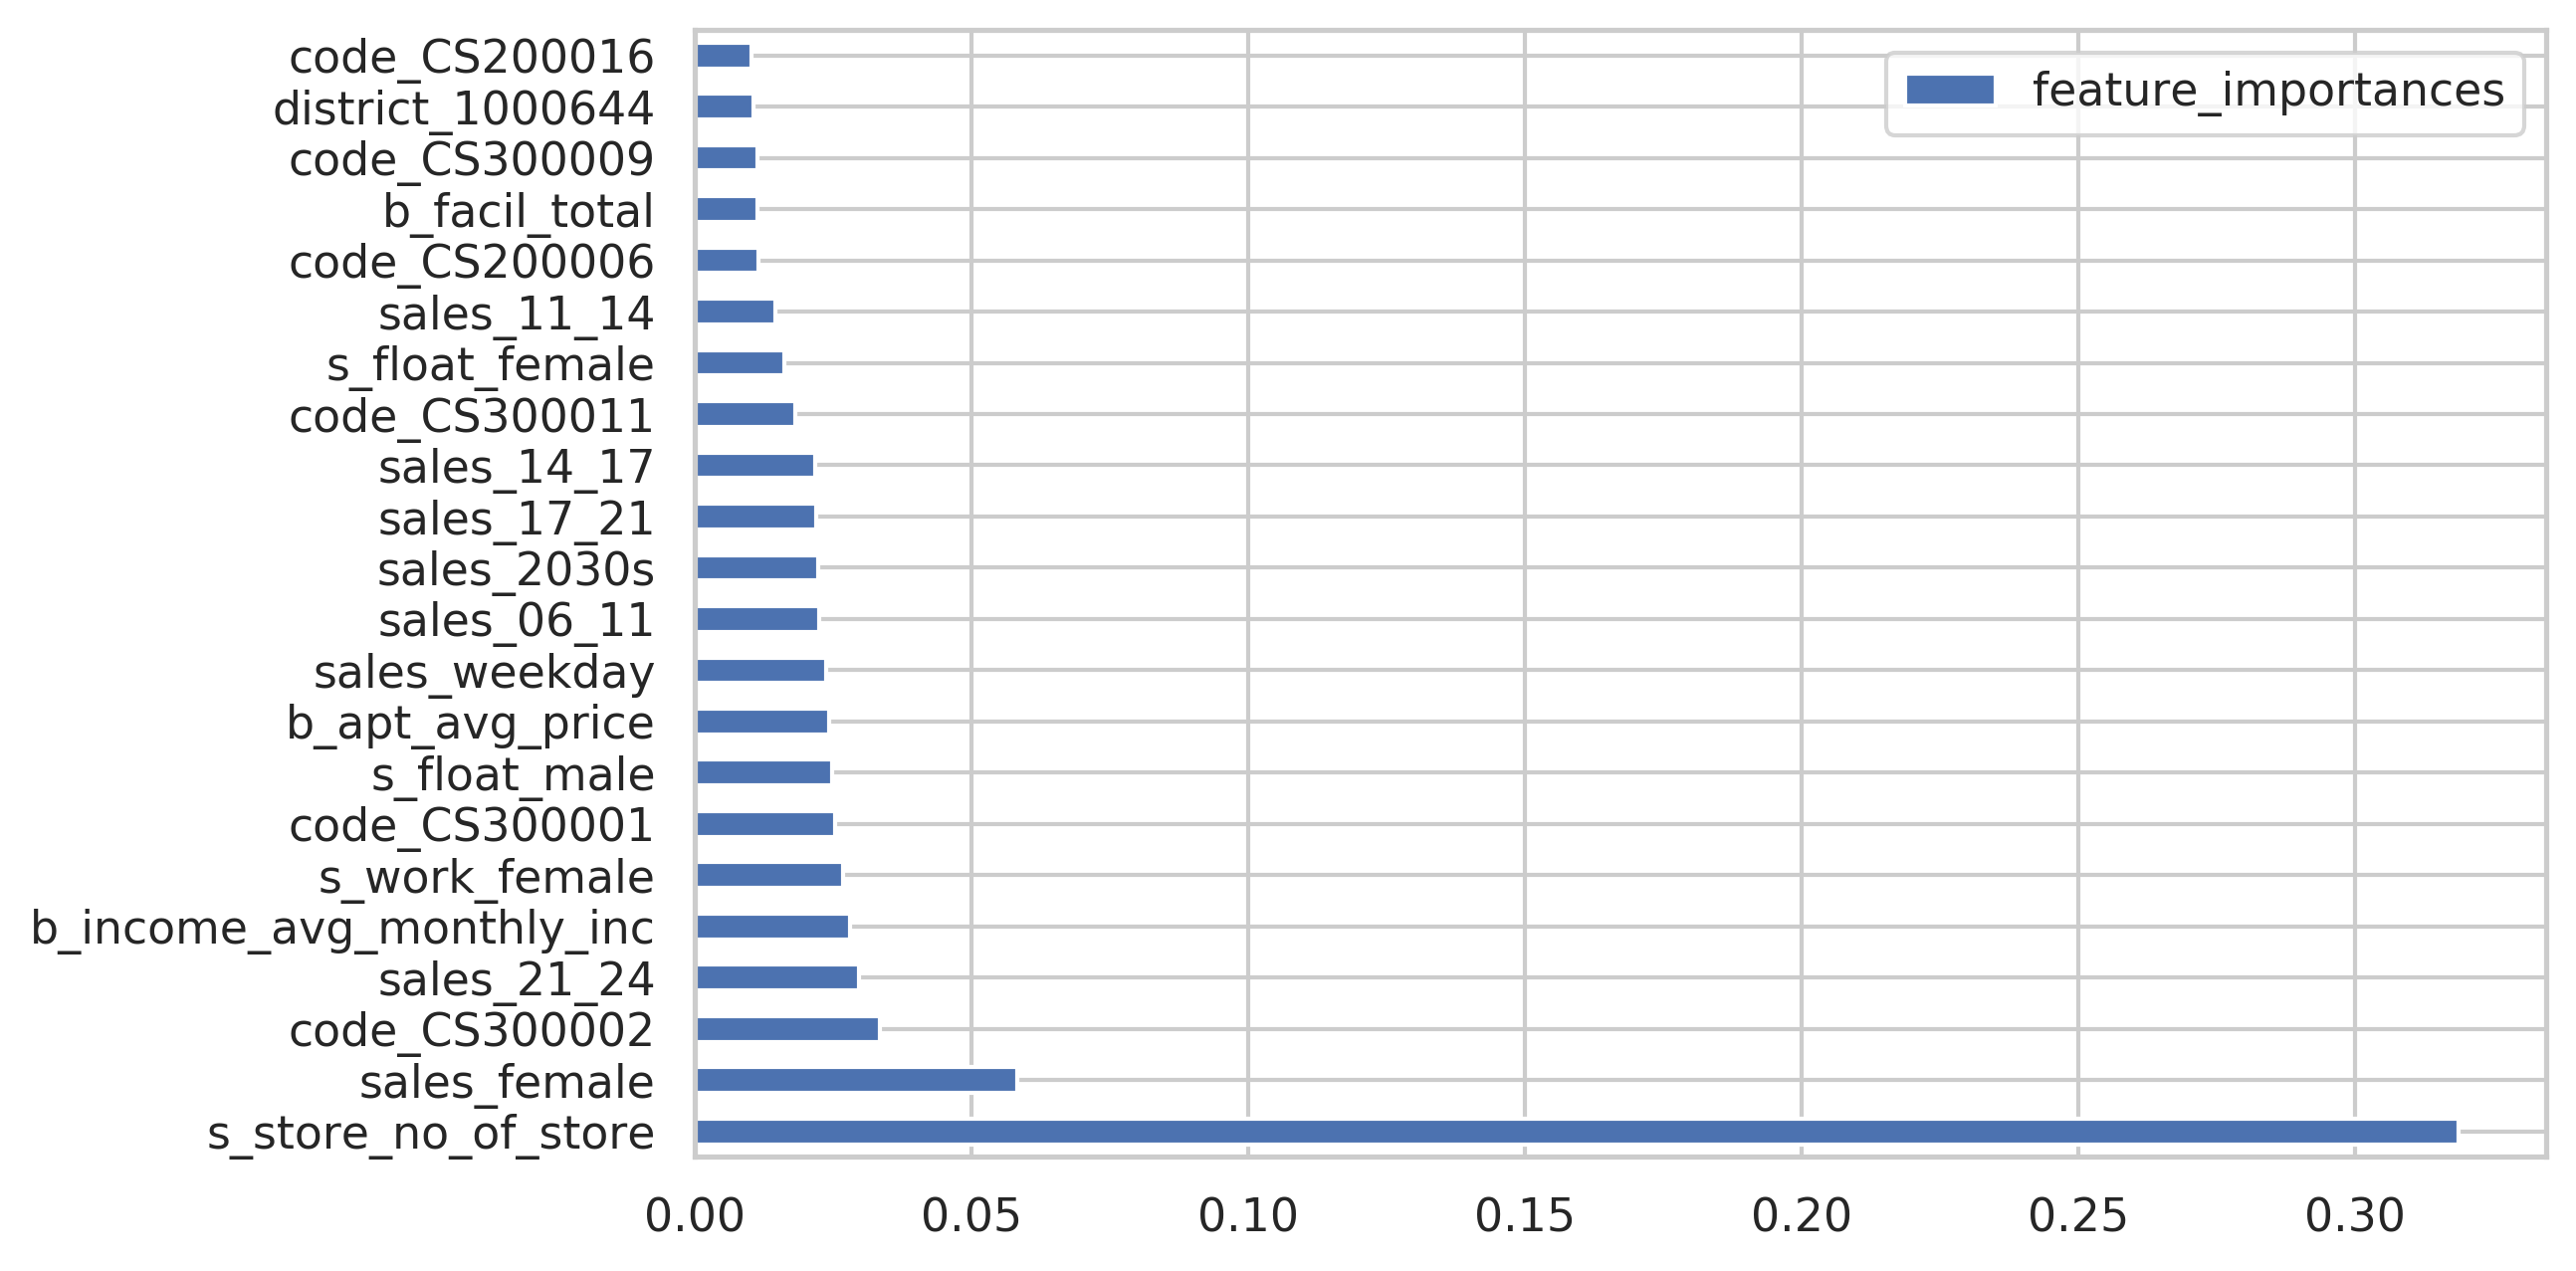

In [161]:
barchart_df.plot.barh()

In [162]:
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 370127595.3246573
Mean Squared Error: 6.607274844680408e+17
Root Mean Squared Error: 812851452.8916343


In [163]:
cv_results = cross_validate(model, Xs_test, y_test, scoring=('r2', 
                                                             'neg_mean_squared_error', 
                                                             'neg_mean_absolute_error'), 
                            cv=cv, 
                            n_jobs=-1)

In [164]:
print('R-Squared 평균:', cv_results['test_r2'].mean())
print('MSE 평균:', -cv_results['test_neg_mean_squared_error'].mean())
print('MAE 평균:', -cv_results['test_neg_mean_absolute_error'].mean())
print('RMSE 평균:', np.sqrt(-cv_results['test_neg_mean_squared_error']).mean())

R-Squared 평균: 0.5514172901123027
MSE 평균: 1.2173343339772063e+18
MAE 평균: 471114734.67388266
RMSE 평균: 1095270005.9121509
